<a href="https://colab.research.google.com/github/takumi0211/DeepSeekOCR/blob/main/Transcribing_with_DeepSeek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Optional
This is for word-wrapping the output of OCR process

In [1]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
      white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

### Setup

In [2]:
!pip install --no-deps -q bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 MB 12.8 MB/s eta 0:00:00


In [3]:
!pip install addict transformers==4.46.3 tokenizers==0.20.3 pdf2image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 35.9 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.22.1
    Uninstalling tokenizers-0.22.1:
      Successfully uninstalled tokenizers-0.22.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.1
    Uninstalling transformers-4.57.1:
      Successfully uninstalled transformers-4.57.1


In [4]:
!apt install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.11 [186 kB]
Fetched 186 kB in 1s (213 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 126675 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.11_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.11) ...
Setting up poppler-utils (22.02.0-2ubuntu0.11) ...
Processing triggers for man-db (2.10.2-1) ...


In [5]:
!mkdir -p /content/outputs /content/pdf_pages/

### PDF to Images

### OCR

In [6]:
from transformers import AutoModel, AutoTokenizer, BitsAndBytesConfig
import torch

model_name = 'deepseek-ai/DeepSeek-OCR'

In [7]:
qc = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float
)

In [8]:
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model = AutoModel.from_pretrained(
    model_name, trust_remote_code=True,
    use_safetensors=True, device_map="auto",
    quantization_config=qc, torch_dtype=torch.float
)
model = model.eval()

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/801 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

modeling_deepseekocr.py: 0.00B [00:00, ?B/s]

modeling_deepseekv2.py: 0.00B [00:00, ?B/s]

configuration_deepseek_v2.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/deepseek-ai/DeepSeek-OCR:
- configuration_deepseek_v2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/deepseek-ai/DeepSeek-OCR:
- modeling_deepseekv2.py
- configuration_deepseek_v2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


conversation.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/deepseek-ai/DeepSeek-OCR:
- conversation.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


deepencoder.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/deepseek-ai/DeepSeek-OCR:
- deepencoder.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/deepseek-ai/DeepSeek-OCR:
- modeling_deepseekocr.py
- modeling_deepseekv2.py
- conversation.py
- deepencoder.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.


model.safetensors.index.json: 0.00B [00:00, ?B/s]

model-00001-of-000001.safetensors:   0%|          | 0.00/6.67G [00:00<?, ?B/s]

Some weights of DeepseekOCRForCausalLM were not initialized from the model checkpoint at deepseek-ai/DeepSeek-OCR and are newly initialized: ['model.vision_model.embeddings.position_ids']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
from pdf2image import convert_from_path

pdf_file = '/content/New XQA-kernel provides 2.4x more Llama-70B throughput within the same latency budget — TensorRT LLM.pdf'
images = convert_from_path(pdf_file)

for i, image in enumerate(images):
    image.save(f'/content/pdf_pages/page_{i+1}.jpg', 'JPEG')

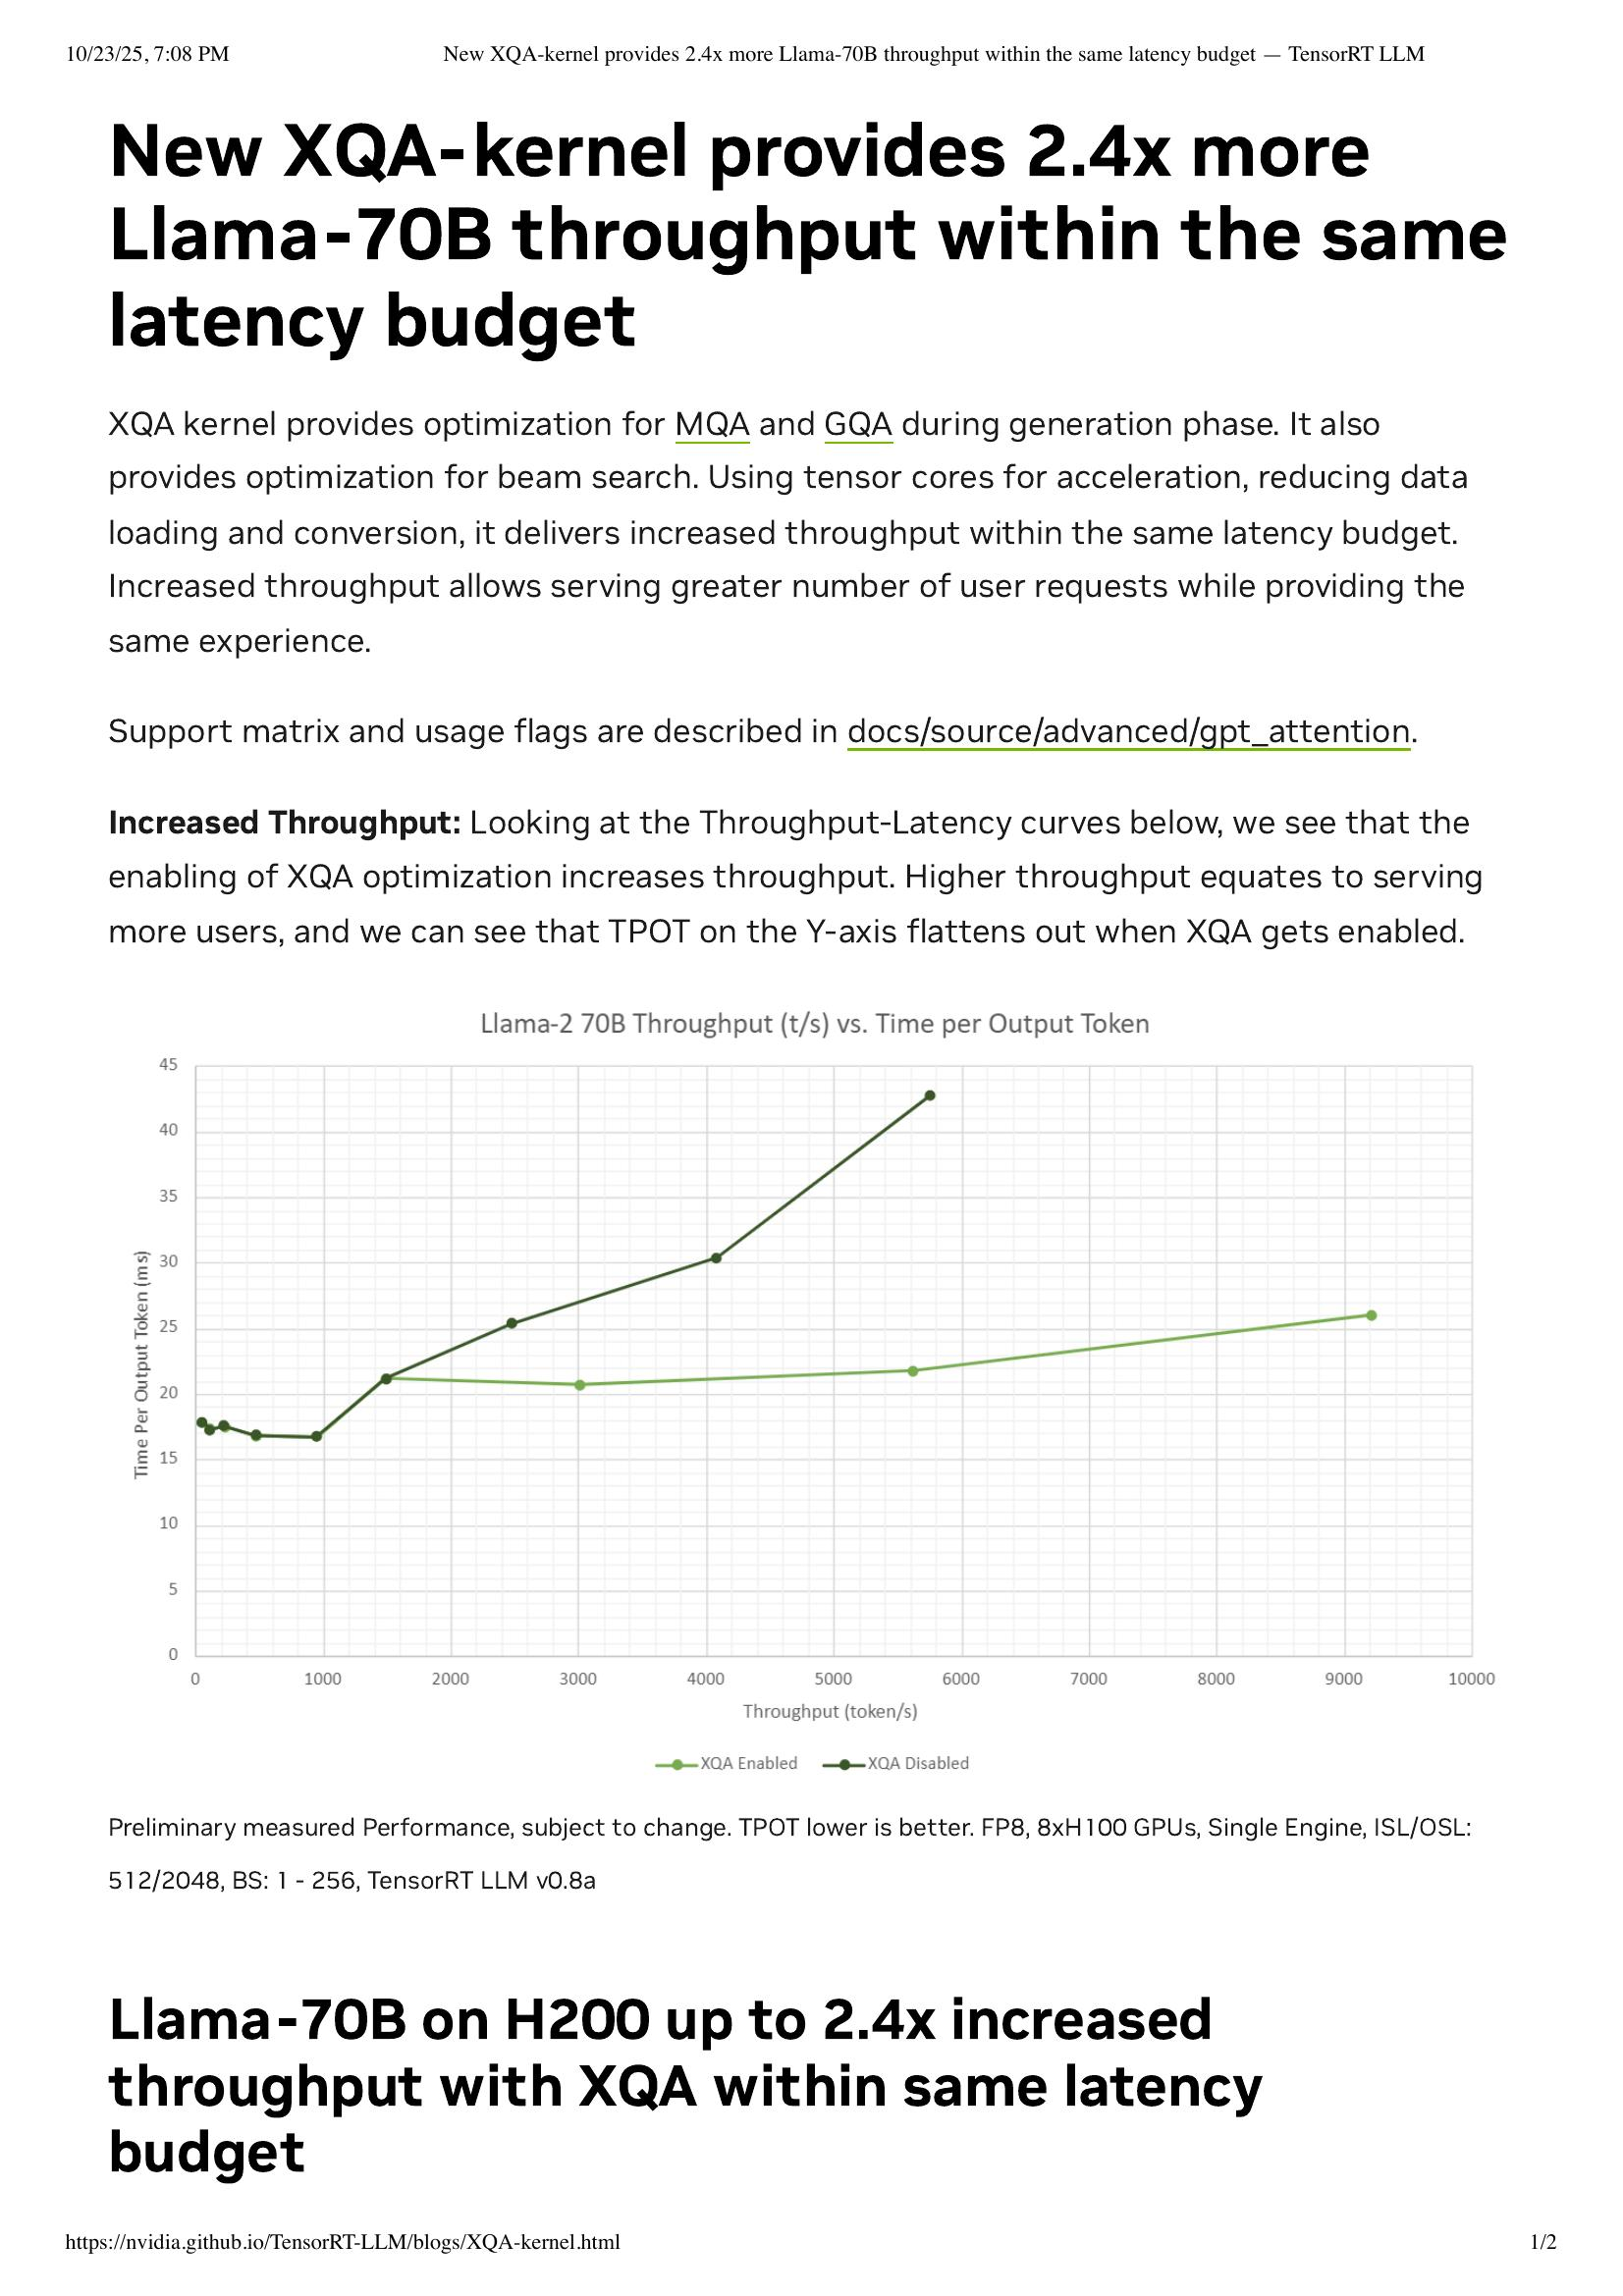

In [10]:
from IPython.display import Image as _I
_I("/content/pdf_pages/page_1.jpg", width=640)

In [11]:
# PDFページが格納されているディレクトリ
pdf_dir = '/content/pdf_pages'

# 推論に使うプロンプト
prompt = "<image>\ntranscribe this."

# 出力先ディレクトリ
output_base = '/content/outputs'

# 全ページを処理
import os

# pdf_dir にあるファイルの数だけループ
for i, filename in enumerate(sorted(os.listdir(pdf_dir))):
    if filename.endswith('.jpg'):
        page_number = i + 1
        image_file = f"{pdf_dir}/page_{page_number}.jpg"
        output_path = f"{output_base}/page_{page_number}"
        print(f"Processing page {page_number}...")

        model.infer(
            tokenizer,
            prompt=prompt,
            image_file=image_file,
            output_path=output_path,
            base_size=1024,
            image_size=1024,
            crop_mode=False,
            save_results=True,
            test_compress=True
        )

print("✅ 全ページのOCRが完了しました！")

Processing page 1...


/usr/local/lib/python3.12/dist-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
`get_max_cache()` is deprecated for all Cache classes. Use `get_max_cache_shape()` instead. Cal

BASE:  torch.Size([1, 256, 1280])
NO PATCHES
New XQA-kernel provides 2.4x more Llama-70B throughput within the same latency budget

XQA kernel provides optimization for MQA and GQA during generation phase. It also provides optimization for beam search. Using tensor cores for acceleration, reducing data loading and conversion, it delivers increased throughput within the same latency budget. Increased throughput allows serving greater number of user requests while providing the same experience.

Support matrix and usage flags are described in docs/source/advanced/gpt_attention.

Increased Throughput: Looking at the Throughput-Latency curves below, we see that the enabling of XQA optimization increases throughput. Higher throughput equates to serving more users, and we can see that TPOT on the Y-axis flattens out when XQA gets enabled.

Llamaz-70B Throughput (t/s) vs. Time per Output Token

Preliminary measured Performance, subject to change. TPOT lower is better. FP8, 8xH100 GPUs, Single

image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]

Processing page 2...



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 256, 1280])
NO PATCHES
| Model | GPUs | Input Length | Output Length | Throughput w/o XQA (tok/s/GPU) | Throughput w/ XQA (tok/s/GPU) | Throughput w/ Speedup |
|-------|------|---------------|----------------|--------------------------------|--------------------------------|-------------------------|
| Llama-70B | 1 | 128 | 2048 | 1,227 | 2,941 | 2.4x |
|       | 8 | 128 | 2048 | 13,232 | 25,300 | 1.9x |

**Closing**

These improvements will be published in the main branch soon, and will be included in the v0.8 releases.

For more information about H200, please see the H200 announcement blog.

Throughput is calculated as output tokens per second per gpu.

out_tps=output_seqlen*batch_size/total_latency/tp

**Glossary:** | DP = Data Parallel | ISL = Input Sequence Length | PP = Pipeline Parallel | OSL = Output Sequence Length | OOM = Out of Memory | TP = Tensor Parallel

**NVIDIA**

Privacy Policy | Manage My Privacy | Do Not Sell or Share My Data | Terms of Service

image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]

✅ 全ページのOCRが完了しました！
